# Exploratory Analysis - Why customers are dropping out?

## Objective:
    - Why customers are unhappily moving out from the bank?
    - What changes/modifications to be done in the existing products to meet the customer needs.
    - Which parameters should be considered while designing new products?

    1. Problem Definition, Domain Exploration
        - define the exact problem you are trying to solve. - Get it verified/validated from peers and managers
        - Understand the business process, common beleifs, understand the data generation process

    2. Data Acquisition & data exploration
        - capture data from multiple units of the business, combine them to build a dataset
        - perform a generic data exploration to understand overall data quality

    3. Data Cleaning
        - Handling duplicated rows
        - Handling missing values
        - Handling unwanted columns
        - Handling outliers - extreme values + unnatural values

    4. Exploratory Analysis
        - Data Visualization
            - Univariate Analysis
            - Bivariate Analysis
            - Multivariate Analysis

       - Statistical Methods
           - Correlation Analysis
           - Inferenetial Statistics - ANOVA, Chi Square test

    5. Prepare the final analytical report
        - Statistical Observation
        - Business Inferenece
        - Recommendations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Exploration

In [2]:
#load data
df = pd.read_csv(r"D:\AI\data\datasets-1\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
print(" hello \n world")

 hello 
 world


In [4]:
print(r" hello \n world")

 hello \n world


In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


    - Do we have any column which logically/statistically CAN NOT have any relation to Exited(customer left or stayed)?
        - Surname, Row Number, CustomerId
    - Do we have multiple columns representing similar information?
        - Numofproducts & HasCrCard
        - CreditScore & HasCrCard

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9985 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9990 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

Observation - there are some values missing for tenure and Estimated Salary

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9985.000000,10000.000000,10000.000000,10000.00000,10000.000000,9990.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.013721,76485.889288,1.530200,0.70550,0.515100,100127.441333,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892213,62397.405202,0.581654,0.45584,0.499797,57497.228065,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51112.885000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100238.110000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149400.922500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
sum(df.Balance==0)

3617

Observations - 
    - Approx 36% of customers are keeping 0 balance in their account
    - more than 50% of customers are having only 1 product.
    - 51% of customers are active members =>> 49 % of the customers are not actively using the bank account / banking products.
    - 20% of customers left the bank

In [10]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010333
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001322
Exited             1.471611
dtype: float64

    - if skewness > +1 or skewness < -1 =>> extreme outliers are present

In [15]:
df.Age.describeribe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [16]:
df.Age.quantile(0.99)

72.0

## 3. Data Cleaning

### Handling duplicated rows

In [14]:
df.duplicated().sum()

0

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [18]:
df.shape

(10000, 14)

In [19]:
# how to perform any process excluding any specific column 
df.drop(['CustomerId'],axis=1).duplicated().sum()

0

In [20]:
df.shape

(10000, 14)

In [22]:
df.CustomerId.duplicated().sum()

0

### Handling missing values
    - If any row is having more than 60-70% of its values missing -> drop those rows
    - if any column having more than 80-90% of values are missing then drop those columns
    
    - Missing value imputation
        - if the percentage of missing value in a column is less than 5% - statistical imputation
            - categorical - nominal - Mode, ordinal - Median
            - Numeric - if skewed - median, if normal distribution(not skewed) - mean
            
        - if the percentage of missing values in a column is between 5% to 25% - ML based imputation
        - if the percentage of missing values are more than 25% and upto 80% then convert that column into categorical attribute with an additional category - "No info available"
     
     
Example - number of times customer has been a defaulter in last 2 years

In [17]:
# check for missing values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [25]:
df[df.Tenure.isnull()==True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
10,11,15767821,Bearce,528,France,Male,31,NaN,102016.72,2,0,0,80181.12,0
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
47,48,15771573,Okagbue,637,Germany,Female,39,NaN,137843.80,1,1,1,117622.80,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
74,75,15770811,Wallace,519,France,Male,36,NaN,0.00,2,0,1,145562.40,0
89,90,15767954,Osborne,635,Germany,Female,28,NaN,81623.67,2,1,1,156791.36,0
107,108,15812878,Parsons,785,Germany,Female,36,NaN,99806.85,1,0,1,36976.52,0
131,132,15718369,Kaodilinakachukwu,795,Germany,Female,33,NaN,130862.43,1,1,1,114935.21,0
147,148,15754105,Olisanugo,650,France,Male,37,NaN,106967.18,1,0,0,24495.03,0
168,169,15574692,Pinto,667,Spain,Female,39,NaN,0.00,2,1,0,40721.24,1


In [26]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010333
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001322
Exited             1.471611
dtype: float64

    - if skew >-0.3 or skew<+0.3 => Normal Distribution - use mean for imputation otherwise use median


In [27]:
df.Tenure.fillna(df.Tenure.mean(),inplace=True)
df.EstimatedSalary.fillna(df.EstimatedSalary.mean(),inplace=True)
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Handling unwanted columns

In [28]:
print(df.shape)
df.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)
print(df.shape)

(10000, 14)
(10000, 11)


In [29]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0


## Handling outliers

In [30]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

## 4. Exploratory Analytics

### Data visualization
#### Univariate Analysis
    - Categorical - discrete frequency distribution - countplot - seaborn
    - Numeric - Continuous frequency distribution - histplot - seaborn, matplotlib

In [31]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


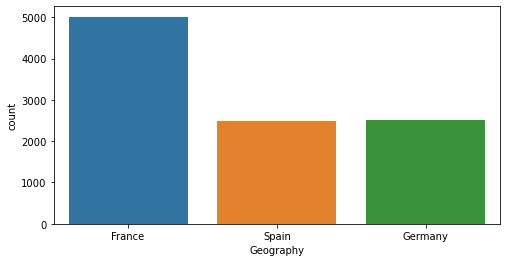

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


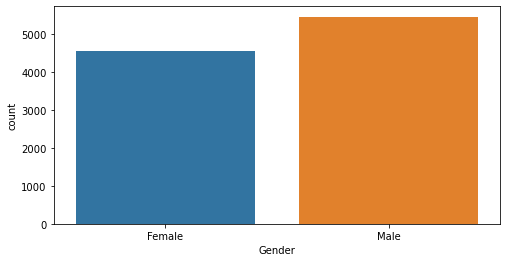

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


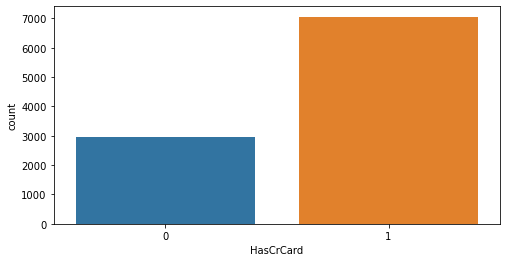

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


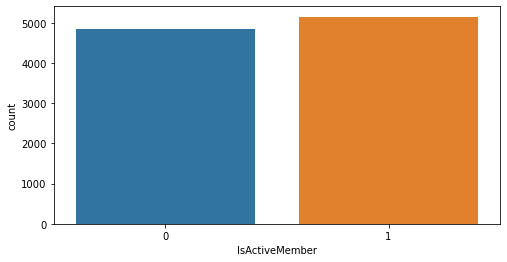

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


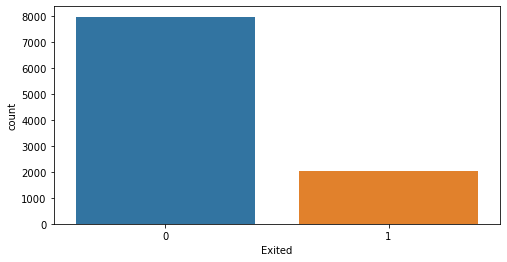

In [35]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    #df[col].value_counts(normalize=True).plot(kind="bar",figsize=(8,4))
    plt.show()

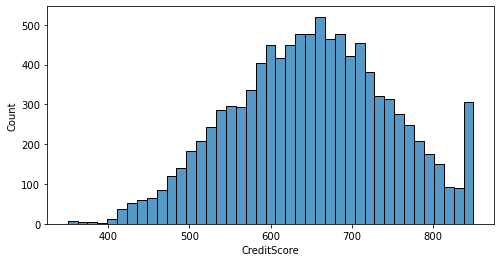

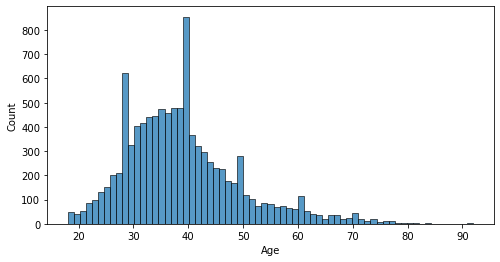

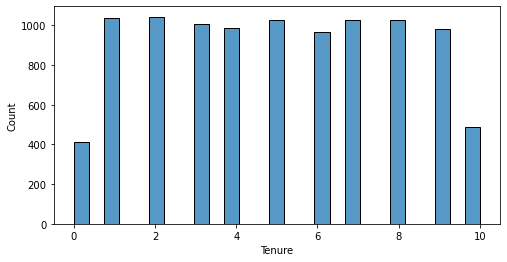

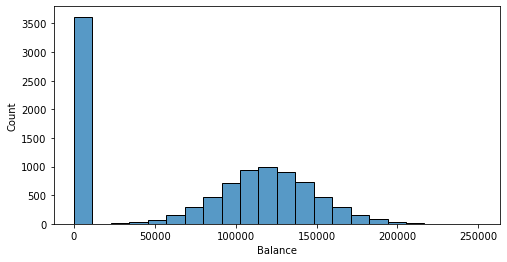

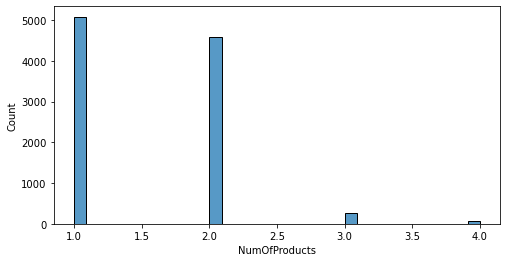

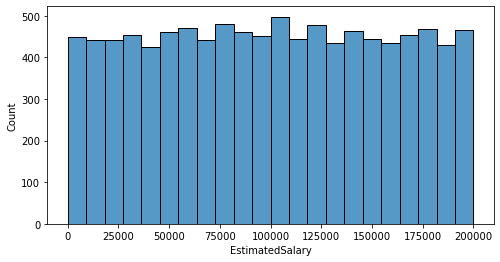

In [36]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in nums:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.show()


#### Bivariate Analysis
    - numeric vs numeric - scatterplot
    - categorical vs categorical - discrete proability distirbution - countplot / barplot
    - categorical vs numeric - continuous probability distirbution - distplot

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


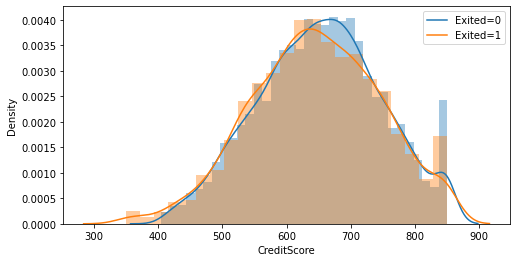

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


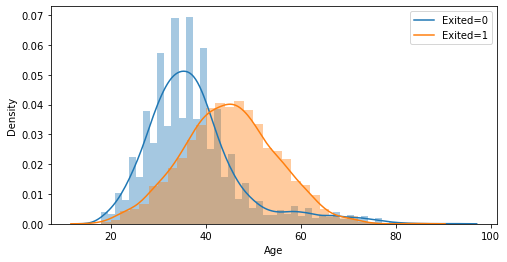

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


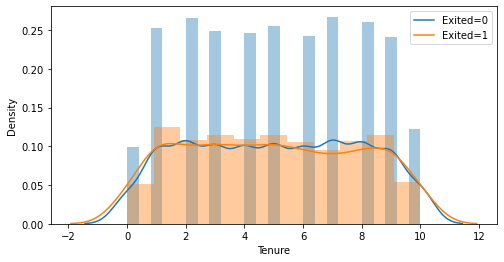

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


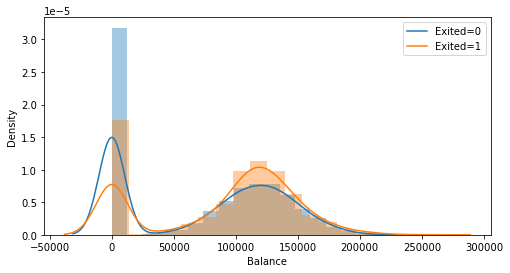

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


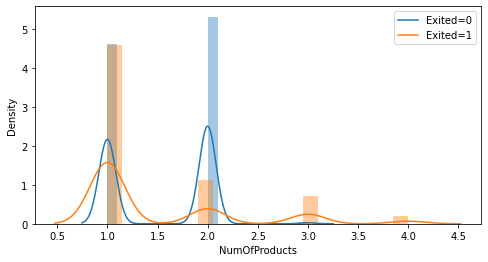

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


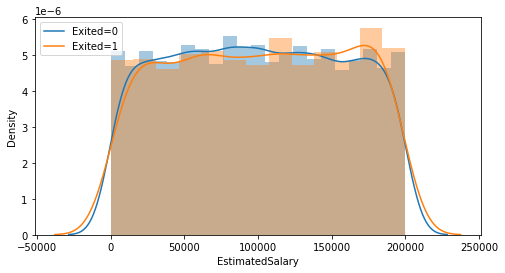

In [39]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in nums:
    plt.figure(figsize=(8,4))
    sns.distplot(df[col][df.Exited==0])
    sns.distplot(df[col][df.Exited==1])
    plt.legend(["Exited=0","Exited=1"])
    plt.show()

In [40]:
# categorical vs categorical
# Geography vs Exited
pivot = pd.crosstab(df.Geography,df.Exited,margins=True)
pivot

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [41]:
output = pivot[1]/pivot['All']
output

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

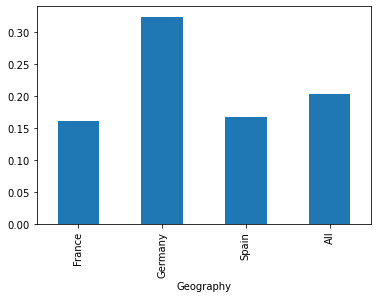

In [42]:
output.plot(kind='bar')
plt.show()